## 26. Нелинейный метод наименьших квадратов. Светимость звезды
[Каханер–Моулер–Нэш]
Сверхновой звезде типа I соответствует специальная модель светимости. Спустя несколько дней после максимума светимости эту модель
можно описать так:
$$
L(t) = C_1 e^{-t/\alpha_1} + C_2 e^{-t/\alpha_2},
$$
где $t$ – время (в днях) с момента максимальной светимости,
а $L(t)$ – светимость, относительно максимальной светимости.
В таблице ниже приведены данные по относительной светимости для свехновой I939A6, полученные в 1936 г.
Пик светимости приходится на день $0$, но наблюдения до дня $7.0$, опущены, так какуказанная модель не описывает
светимости перед и непосредственно после максимума.

```
    t      L(t)    
--------------------
   7.0    0.6310     
   7.0    0.8318     
  14.8    0.2754     
  16.0    0.1445     
  16.9    0.2089     
  17.0    0.1585     
  18.8    0.1585     
  19.0    0.1318     
  20.9    0.1585     
  15.8    0.1096     
  16.8    0.1445     
  28.0    0.09120    
  53.0    0.06310    
  54.0    0.06918    
  57.0    0.05754    
  85.0    0.03631    
 109.0    0.02291    
 110.0    0.02291    
 141.0    0.01738    
 142.0    0.01585    
 168.0    0.009120   
```

Нанести данные на график.
Нелинейным методом наименьших квадратов найдите неизвестные параметры модели и постройте графики.
Используйте различные начальные значения для $\alpha_1$, $\alpha_2$, $C_1$, $C_2$.
Чему равна результирующая суммарная ошибка?
Насколько чувствительны результирующие значения к начальным значениям?

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import optimize

In [15]:

t = np.array([7.0, 7.0, 14.8, 16.0, 16.9, 17.0, 18.8, 19.0, 20.9, 15.8, 
              16.8, 28.0, 53.0, 54.0, 57.0, 85.0, 109.0,110.0,141.0, 142.0,168.0])
L = np.array([0.6310, 0.8318, 0.2754, 0.1445, 0.2089,0.1585,0.1585,0.1318,0.1585,0.1096,
              0.1445,0.09120,0.06310,0.06918,0.05754,0.03631,0.02291,0.02291 ,0.01738,0.01585,0.009120])

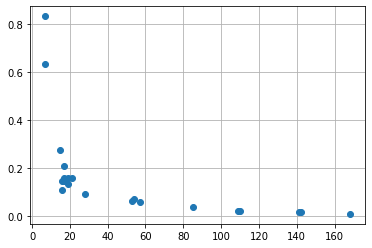

In [16]:
plt.plot(t, L ,'o')
plt.grid()
pass

In [20]:
def fun1(t,C1,C2, a1,a2):
    return C1*np.exp(-t/a1) + C2*np.exp(-t/a2)

In [17]:
res, _ = optimize.curve_fit(fun,t,L)
C1, C2, a1,a2 = res
C1, C2, a1,a2

(3.566262725358919, 0.15975282059259002, 3.8904848139870194, 58.51405537409436)

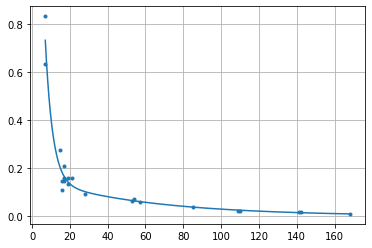

In [21]:
X = np.linspace(np.min(t), np.max(t), 1000)
Y = fun1(X,C1,C2,a1,a2)
plt.plot(t, L, '.', color='tab:blue')
plt.plot(X, Y)
plt.grid()
pass

In [23]:
K = np.array([17.0, 18.8, 19.0, 20.9, 15.8, 16.8, 28.0, 53.0, 54.0, 57.0, 85.0, 109.0,110.0,141.0, 142.0,168.0])
L1 = np.array([0.1585,0.1585,0.1318,0.1585,0.1096,0.1445,0.09120,0.06310,0.06918,0.05754,0.03631,0.02291,0.02291 ,0.01738,0.01585,0.009120])

In [25]:
def fun2(K, C1, C2, a1, a2):
    return C1*math.e**(-K/a1) + C2*math.e**(-K/a2)
res1, _ = optimize.curve_fit(fun2,K,L1)
C1, C2, a1,a2 = res1
C1, C2, a1,a2

(1.228805627980817, -1.027054329176312, 48.93419229233196, 48.93480190877333)

### на графикe

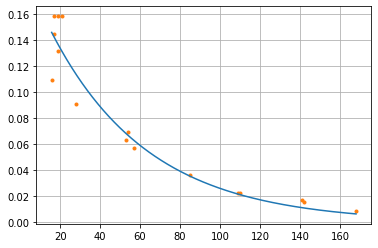

In [29]:
X = np.linspace(np.min(K), np.max(K), 1000)
Y = fun2(X,C1,C2,a1,a2)
plt.plot(K, L1, '.', color='tab:orange')
plt.plot(X, Y)
plt.grid()
pass

In [32]:
def fun3(t,a1, a2):
    return math.e**(-t/a1) + math.e**(-t/a2)

In [33]:
res, _ = optimize.curve_fit(fun3,t,L)
a1,a2 = res
a1,a2

(8.078306231310245, 5.74676198224591)

### Ha графикe

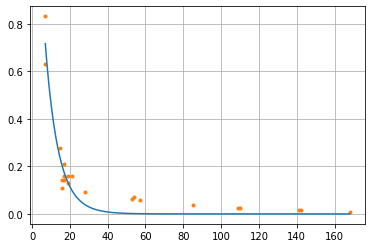

In [37]:
X = np.linspace(np.min(t), np.max(t), 10000)
Y = fun3(X,a1,a2)
plt.plot(t, L, '.', color='tab:orange')
plt.plot(X, Y)
plt.grid()
pass

### Уменьшение количества входных данных

In [42]:
def fun4(K,a1, a2):
    return math.e**(-K/a1) + math.e**(-K/a2)


In [43]:
res, _ = optimize.curve_fit(fun4,K,L1)
a1,a2 = res
a1,a2

(0.10686917489283232, 9.302094731491177)

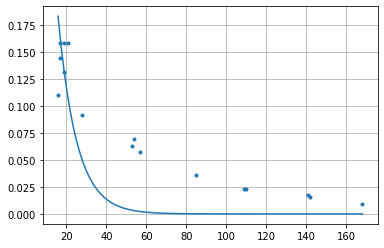

In [44]:
X = np.linspace(np.min(K), np.max(K), 100)
Y = fun4(X,a1,a2)
plt.plot(K, L1, '.', color='tab:blue')
plt.plot(X, Y)
plt.grid()
pass

### Найдём результирующую :

In [53]:
##Входные данные
np.sqrt(np.sum(fun1(t, C1, C2, a1, a2)/len(t))**2)

0.11843621326548763

In [54]:
#Изменённые входные данные
np.sqrt(np.sum((fun2(K,C1,C2,a1,a2))/len(K))**2)

0.05995235630533778

In [55]:
#Только экспонента
np.sqrt(np.sum((fun3(t,a1,a2))/len(t))**2)

0.11531640527767638

In [56]:
#Изменённые входные данные с использованием только экспоненты
np.sqrt(np.sum((fun4(K,a1,a2))/len(K))**2)

0.05837311094673932

Насколько чувствительны результирующие значения к начальным значениям?¶


In [57]:
# При увеличении количества входных значений увеличивается точность